In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix

cf.go_offline()
%matplotlib inline 

In [2]:
# To read the dataframe 
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Machine_Learning/Machine Learning/K-Means /Project/dataset.csv')

# To check the header 
df.head(8)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73


In [3]:
# Decribing and checking the info of the data 

# Describing the data 
print(df.describe())

print('\n')

# To check the info of the dataset 
df.info()

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

In [4]:
# To check the columns 
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

Text(0.5, 1.0, 'Grad.Rate versus Room.Board')

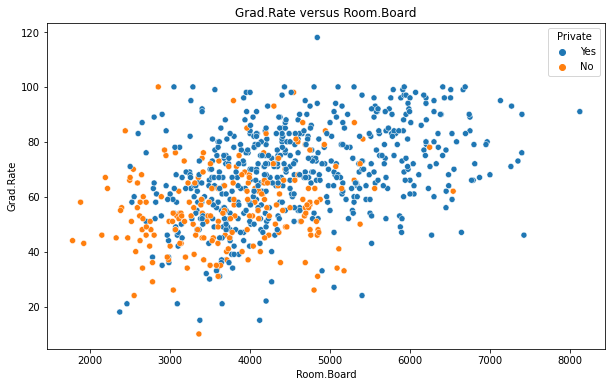

In [5]:
# Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Room.Board',y='Grad.Rate',hue='Private')
plt.title('Grad.Rate versus Room.Board')

Text(0.5, 1.0, 'F.Undergrad versus Outstate')

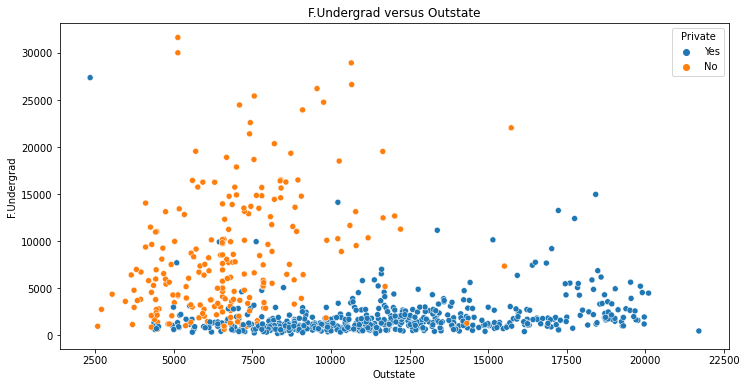

In [6]:
# Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Outstate',y='F.Undergrad',hue='Private')
plt.title('F.Undergrad versus Outstate')

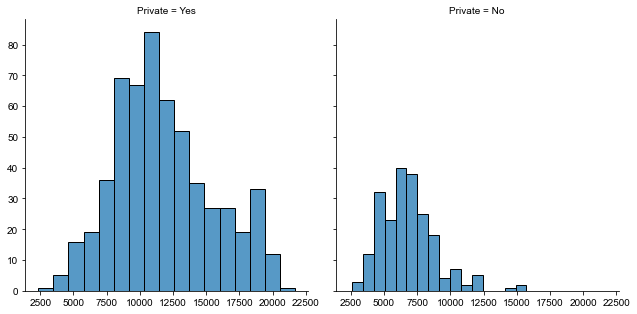

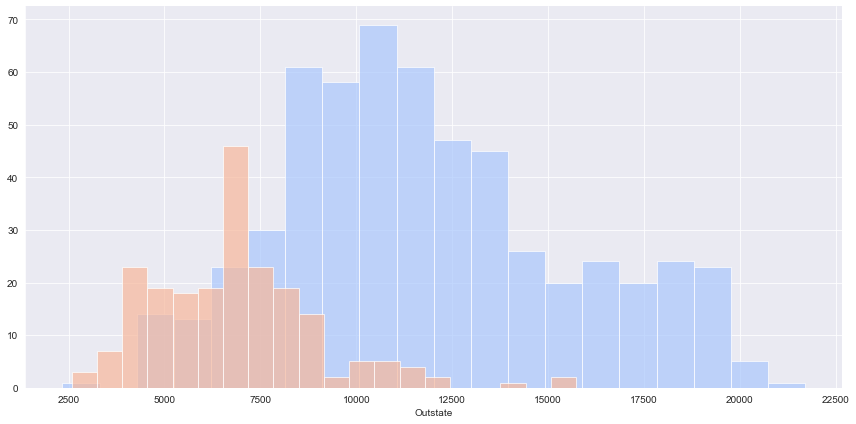

In [7]:
# Create a stacked histogram showing Out of State Tuition based on the Private column.

# Using a sns.FacetGrid
g = sns.FacetGrid(df,col='Private',height=4.5)
g.map_dataframe(sns.histplot,x='Outstate')

# Stacked facetgrid
sns.set_style('darkgrid')
b = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
b = b.map(plt.hist,'Outstate',bins=20,alpha=0.7)

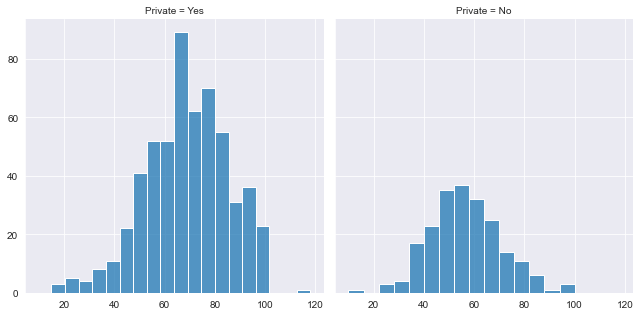

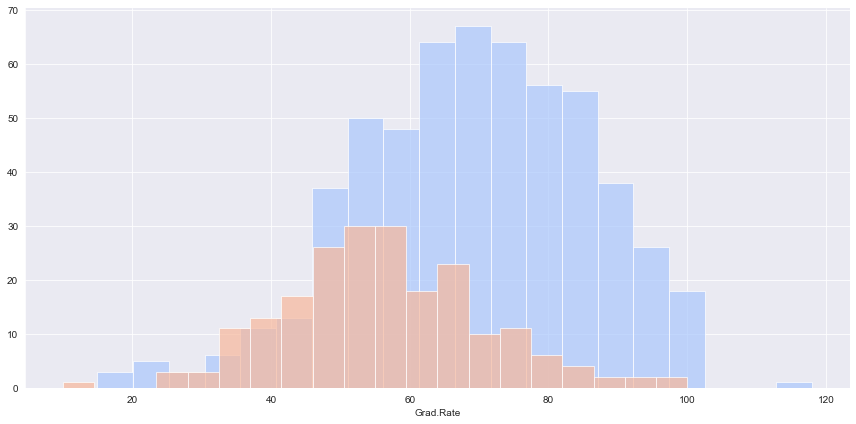

In [29]:
# histogram for the Grad.Rate column.

# Using a sns.FacetGrid
g = sns.FacetGrid(df,col='Private',height=4.5)
g.map_dataframe(sns.histplot,x='Grad.Rate')

# Stacked facetgrid
sns.set_style('darkgrid')
b = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
b = b.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [8]:
# Fetch the private school with a graduation rate of higher than 100%
df[df['Grad.Rate'] > 100] 

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [9]:
# Set that school's graduation rate to 100
df['Grad.Rate']['Cazenovia College'] = 100

In [16]:
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


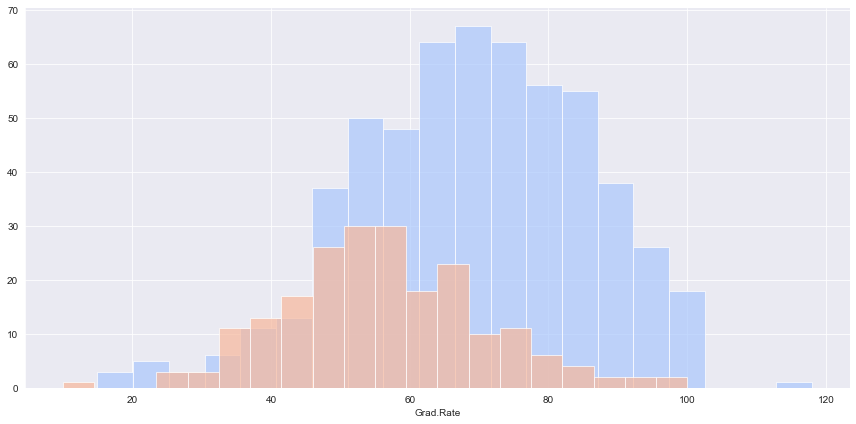

In [11]:
sns.set_style('darkgrid')
x = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
x = x.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

# K Means Cluster Creation

In [12]:
# Create an instance of a K Means model with 2 clusters 
km = KMeans(n_clusters=2)

In [13]:
# it the model to all the data except for the Private label 
km.fit(df.drop('Private',axis=1))

ValueError: could not convert string to float: 'Abilene Christian University'

In [15]:
# Print the cluster center vectors
print('The central point for the clusters is:'+ '\n',km.cluster_centers_)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'